In [33]:
import numpy as np

In [24]:
import tushare as ts

In [34]:
import pandas as pd

In [25]:
kd = ts.get_k_data("600517", ktype="D")

In [26]:
kd.tail()

,date,open,close,high,low,volume,code
635,2018-04-09,5.39,5.46,5.50,5.31,73598.0,600517
636,2018-04-10,5.46,5.39,5.47,5.33,77452.0,600517
637,2018-04-11,5.42,5.34,5.42,5.33,104933.0,600517
638,2018-04-12,5.30,5.11,5.38,5.09,169312.0,600517
639,2018-04-13,5.13,5.12,5.19,5.11,61727.0,600517


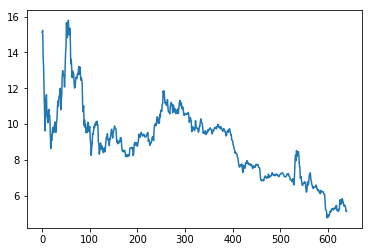

In [32]:
%matplotlib inline
kd['close'].plot()

In [38]:
%time
kd['Ret_loop'] = 0.0
for i in range(1, len(kd)):
    kd['Ret_loop'][i] = np.log(kd['close'][i] / kd['close'][i-1])

Wall time: 0 ns


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
kd[['close', 'Ret_loop']].tail()

,close,Ret_loop
635,5.46,0.011050
636,5.39,-0.012903
637,5.34,-0.009320
638,5.11,-0.044026
639,5.12,0.001955


In [40]:
%time
kd['return'] = np.log(kd['close']/kd['close'].shift(1))  #same as the loop before, but more faster

Wall time: 0 ns


In [43]:
kd[['close', 'Ret_loop', 'return']].tail()

,close,Ret_loop,return
635,5.46,0.011050,0.011050
636,5.39,-0.012903,-0.012903
637,5.34,-0.009320,-0.009320
638,5.11,-0.044026,-0.044026
639,5.12,0.001955,0.001955


In [44]:
del kd['Ret_loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016B00278>,
      dtype=object)

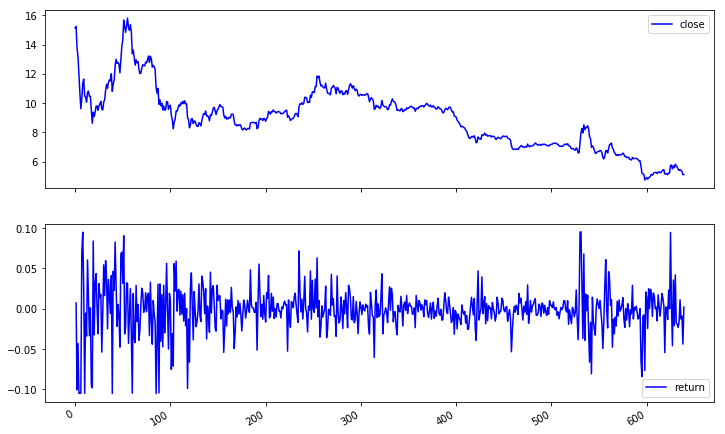

In [53]:
%matplotlib inline
kd[['close', 'return']].plot(subplots=True, style='b', figsize=(12,8))

In [49]:
kd['30d'] = pd.rolling_mean(kd['close'], window=30)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


In [50]:
kd['120d'] = kd['close'].rolling(window=120).mean()

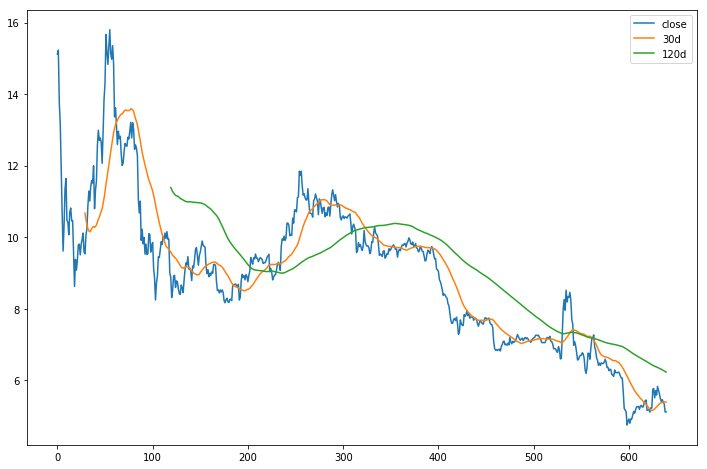

In [52]:
%matplotlib inline
kd[['close', '30d', '120d']].plot(figsize=(12, 8))

In [54]:
import math
kd['Mov_Vol'] = pd.rolling_std(kd['return'], window=252) * math.sqrt(252)  #对数收益率的移动标准差

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  


In [55]:
kd['Mov_Vol'] = kd['return'].rolling(window=252).std()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016A74F28>,
      dtype=object)

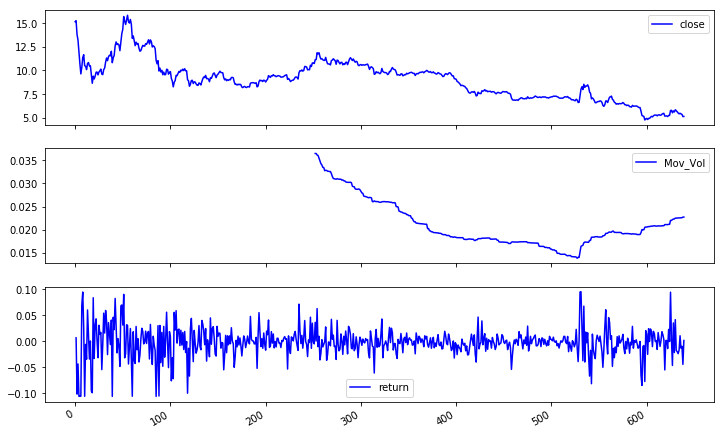

In [56]:
%matplotlib inline
kd[['close', 'Mov_Vol', 'return']].plot(subplots=True, style='b', figsize=(12, 8))